In [134]:
#导入库
import pandas as pd
import math
import matplotlib.pyplot as plt

In [135]:
#导入数据
path1=r'D:\Ugorgeous\LLLLearning\introduction to data science\Advertising.csv'
data1=pd.read_csv (path1)

In [136]:
#查看数据结构
data1.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [138]:
data1.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [140]:
#变量初步设定
ulr_data=data1

X=['TV','radio','newspaper']
y_data=ulr_data['sales']

beta_1=[]
beta_0=[]
TSS=[]
RSS=[]
R_squared=[]

In [141]:
#一元线性回归
TSS = sum((y_data - y_data.mean()) ** 2)
for i in range(len(X)):
    x_data = ulr_data[X[i]]

    beta_1.append(sum((x_data - x_data.mean()) * (y_data - y_data.mean())) / sum((x_data - x_data.mean()) ** 2))
    beta_0.append(y_data.mean() - beta_1[i] * x_data.mean())

    RSS.append(sum((y_data - (beta_1[i] * x_data + beta_0[i])) ** 2))
    R_squared.append(1 - RSS[i] / TSS)


In [146]:
#结果汇总
results0={'beta_1':pd.Series(beta_1,index=X),
    'beta_0':pd.Series(beta_0,index=X),
    'TSS':pd.Series(TSS,index=X),
    'RSS':pd.Series(RSS,index=X),
    'R_squared':pd.Series(R_squared,index=X)}
results=pd.DataFrame(results0)

print("unary linear regression functions and results:")
for i in range(len(X)):
    print("%s:\ny=%f*x+%f" % (X[i],beta_1[i],beta_0[i]))
results

unary linear regression functions and results:
TV:
y=0.047537*x+7.032594
radio:
y=0.202496*x+9.311638
newspaper:
y=0.054693*x+12.351407


,beta_1,beta_0,TSS,RSS,R_squared
TV,0.047537,7.032594,5417.14875,2102.530583,0.611875
radio,0.202496,9.311638,5417.14875,3618.479549,0.332032
newspaper,0.054693,12.351407,5417.14875,5134.804544,0.052120


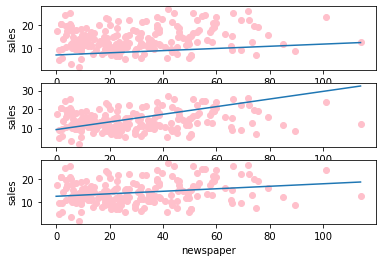

In [143]:
#绘图
i=0

plt.subplot(311)
plt.xlabel(X[i])
plt.ylabel('sales')
plt.plot([0,x_data.max()],[beta_0[i],x_data.max()*beta_1[i]+beta_0[i]])
plt.scatter(x_data,y_data,color='pink')

i=1
plt.subplot(312)
plt.xlabel(X[i])
plt.ylabel('sales')
plt.plot([0,x_data.max()],[beta_0[i],x_data.max()*beta_1[i]+beta_0[i]])
plt.scatter(x_data,y_data,color='pink')

i=2
plt.subplot(313)
plt.xlabel(X[i])
plt.ylabel('sales')
plt.plot([0,x_data.max()],[beta_0[i],x_data.max()*beta_1[i]+beta_0[i]])
plt.scatter(x_data,y_data,color='pink')